# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [6]:
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [8]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [18]:
loan.groupby('Default').describe()

Income                                                    Loan Amount  \
         count       mean       std   min   25%   50%   75%   max       count   
Default                                                                         
No        17.0  23.176471  6.569202  13.0  18.0  23.0  28.0  34.0        17.0   
Yes       13.0  13.000000  7.516648   5.0   8.0  12.0  14.0  28.0        13.0   

                                                             
              mean        std  min   25%   50%   75%    max  
Default                                                      
No       44.882353  32.112852  8.0  15.0  35.0  76.0  100.0  
Yes      61.230769  35.548450  9.0  30.0  51.0  90.0  110.0

In [19]:
loan.groupby('Default').agg(['mean','std','min','max'])

Income                   Loan Amount                    
              mean       std min max        mean        std min  max
Default                                                             
No       23.176471  6.569202  13  34   44.882353  32.112852   8  100
Yes      13.000000  7.516648   5  28   61.230769  35.548450   9  110

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

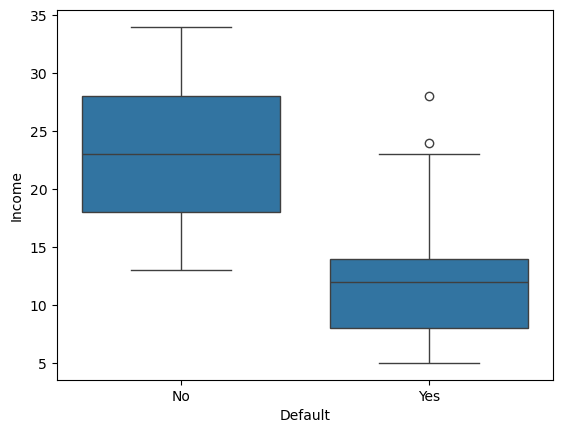

In [5]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

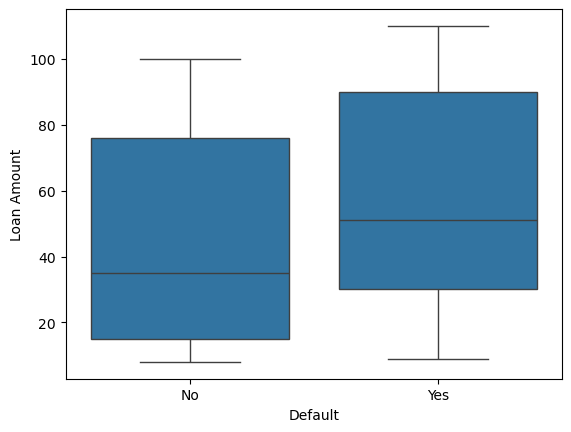

In [16]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

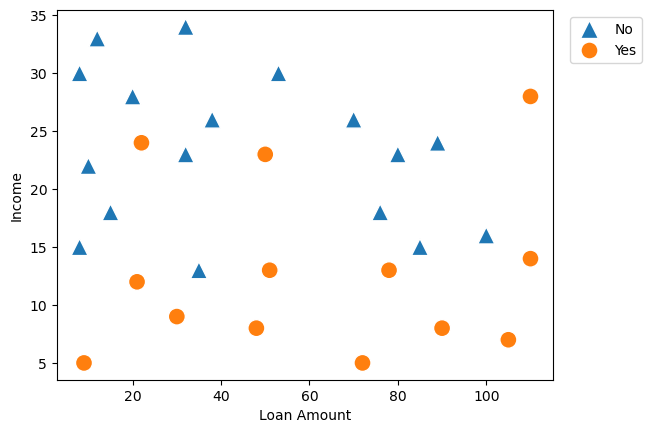

In [20]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [22]:
y = loan[['Default']]

In [24]:
X = loan[['Income','Loan Amount']]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [26]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [29]:
model = classifier.fit(X_train,y_train)

In [32]:
model.score(X_test, y_test)

0.5

## 5. Visualize the Classification Tree

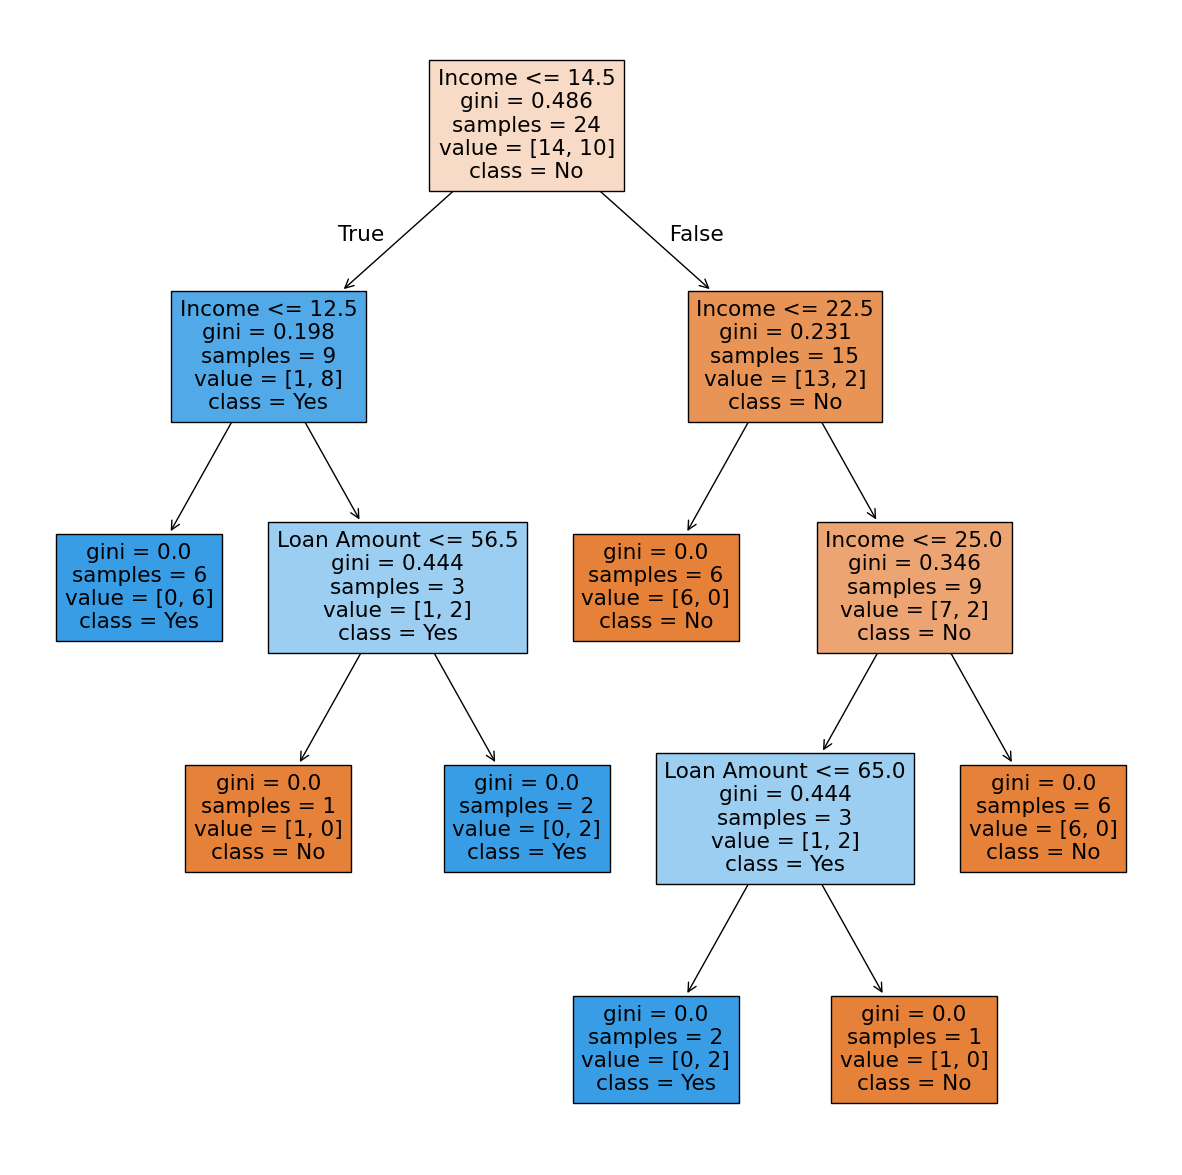

In [34]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);

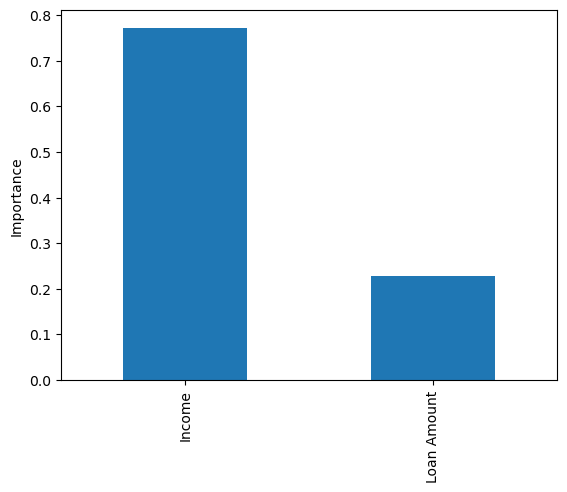

In [35]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [36]:
model.score(X_train, y_train)

1.0

In [37]:
model.score(X_test, y_test)

0.5

In [40]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [45]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv =    (estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

,estimator,DecisionTreeC...om_state=1234)
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': range(1, 7), 'min_samples_split': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [46]:
gcv.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
model_ = gcv.best_estimator_

In [48]:
model_.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
model_.score(X_train, y_train)

0.875

In [50]:
model_.score(X_test, y_test)

0.8333333333333334

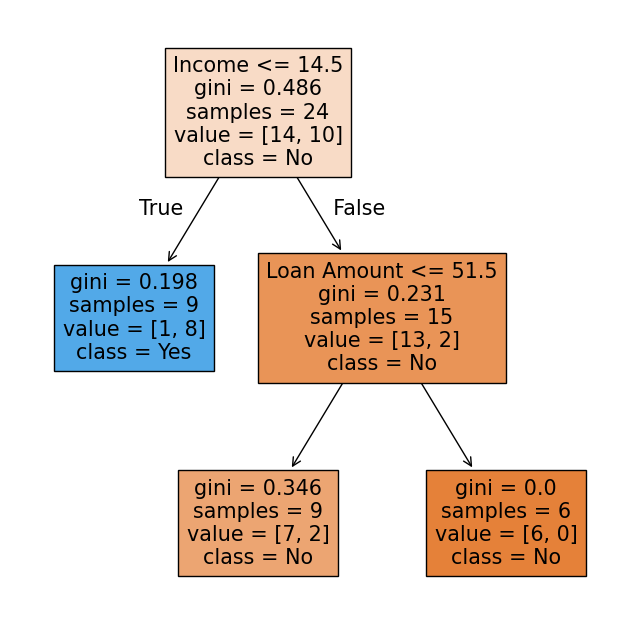

In [51]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);